In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
from scipy import stats

In [3]:
import pprint
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
from scipy import stats
from sklearn.metrics import confusion_matrix

In [4]:
from sim_analysis import (
    read_gene_ranges,
    get_sim_runs,
    get_config,
    get_simid,
    get_r_hmrf_loglikelihood,
    get_best_r_hmrf,
    get_true_clones,
    get_calico_clones,
    get_starch_clones,
    get_numbat_clones,
    plot_clones,
    get_cna_seglevel,
    read_calico_gene_cna,
    read_true_cna,
    read_true_gene_cna,
    plot_rdr_baf,
    get_clone_aris,
    plot_clone_aris,
    get_truth_cna_file,
    get_cna_f1s,
    plot_cna_f1s,
    get_sim_run_generator,
    read_numbat_gene_cna,
    get_numbat_cna_file,
    map_unique_entries,
    copies_to_rdrbaf,
    configure_warnings,
    get_calicost_results,
    get_r_hmrf_loglikelihoods,
    get_sim_runs_stats
)

## Configuration

In [5]:
configure_warnings()

In [6]:
sns.set(font='Arial')

pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.float_format', lambda x: '%.6e' % x)

plt.rcParams.update({'font.size': 14})

In [7]:
calico_repo_dir = "/Users/mw9568/Work/ragr/CalicoST/"

true_dir = "../simulated_data_related"
numbat_dir = "../numbat_related"
starch_dir = "../starch_related"

calico_pure_dir = "../nomixing_calicost_related"
# calico_pure_dir = "../nomixing_calicost_related_nomerge"

### Available Runs

Summary table on the available simulations and the corresponding (per-seed) calicoST results

In [8]:
sim_runs = get_sim_runs()
sim_runs

simid    cnas  n_cnas cna_size  ploidy  random
0   numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3      1e7       2       0
1   numcnas1.2_cnasize1e7_ploidy2_random1  (1, 2)       3      1e7       2       1
2   numcnas1.2_cnasize1e7_ploidy2_random2  (1, 2)       3      1e7       2       2
3   numcnas1.2_cnasize1e7_ploidy2_random3  (1, 2)       3      1e7       2       3
4   numcnas1.2_cnasize1e7_ploidy2_random4  (1, 2)       3      1e7       2       4
5   numcnas1.2_cnasize1e7_ploidy2_random5  (1, 2)       3      1e7       2       5
6   numcnas1.2_cnasize1e7_ploidy2_random6  (1, 2)       3      1e7       2       6
7   numcnas1.2_cnasize1e7_ploidy2_random7  (1, 2)       3      1e7       2       7
8   numcnas1.2_cnasize1e7_ploidy2_random8  (1, 2)       3      1e7       2       8
9   numcnas1.2_cnasize1e7_ploidy2_random9  (1, 2)       3      1e7       2       9
10  numcnas1.2_cnasize3e7_ploidy2_random0  (1, 2)       3      3e7       2       0
11  numcnas1.2_cnasize3e7_ploidy2_random1  (1, 2)       3      3e7       2       1
12  numcnas1.2_cnasize3e7_ploidy2_random2  (1, 2)       3      3e7       2       2
13  numcnas1.2_cnasize3e7_ploidy2_random3  (1, 2)       3      3e7       2       3
14  numcnas1.2_cnasize3e7_ploidy2_random4  (1, 2)       3      3e7       2       4
15  numcnas1.2_cnasize3e7_ploidy2_random5  (1, 2)       3      3e7       2       5
16  numcnas1.2_cnasize3e7_ploidy2_random6  (1, 2)       3      3e7       2       6
17  numcnas1.2_cnasize3e7_ploidy2_random7  (1, 2)       3      3e7       2       7
18  numcnas1.2_cnasize3e7_ploidy2_random8  (1, 2)       3      3e7       2       8
19  numcnas1.2_cnasize3e7_ploidy2_random9  (1, 2)       3      3e7       2       9
20  numcnas1.2_cnasize5e7_ploidy2_random0  (1, 2)       3      5e7       2       0
21  numcnas1.2_cnasize5e7_ploidy2_random1  (1, 2)       3      5e7       2       1
22  numcnas1.2_cnasize5e7_ploidy2_random2  (1, 2)       3      5e7       2       2
23  numcnas1.2_cnasize5e7_ploidy2_random3  (1, 2)       3      5e7       2       3
24  numcnas1.2_cnasize5e7_ploidy2_random4  (1, 2)       3      5e7       2       4
25  numcnas1.2_cnasize5e7_ploidy2_random5  (1, 2)       3      5e7       2       5
26  numcnas1.2_cnasize5e7_ploidy2_random6  (1, 2)       3      5e7       2       6
27  numcnas1.2_cnasize5e7_ploidy2_random7  (1, 2)       3      5e7       2       7
28  numcnas1.2_cnasize5e7_ploidy2_random8  (1, 2)       3      5e7       2       8
29  numcnas1.2_cnasize5e7_ploidy2_random9  (1, 2)       3      5e7       2       9
30  numcnas3.3_cnasize1e7_ploidy2_random0  (3, 3)       6      1e7       2       0
31  numcnas3.3_cnasize1e7_ploidy2_random1  (3, 3)       6      1e7       2       1
32  numcnas3.3_cnasize1e7_ploidy2_random2  (3, 3)       6      1e7       2       2
33  numcnas3.3_cnasize1e7_ploidy2_random3  (3, 3)       6      1e7       2       3
34  numcnas3.3_cnasize1e7_ploidy2_random4  (3, 3)       6      1e7       2       4
35  numcnas3.3_cnasize1e7_ploidy2_random5  (3, 3)       6      1e7       2       5
36  numcnas3.3_cnasize1e7_ploidy2_random6  (3, 3)       6      1e7       2       6
37  numcnas3.3_cnasize1e7_ploidy2_random7  (3, 3)       6      1e7       2       7
38  numcnas3.3_cnasize1e7_ploidy2_random8  (3, 3)       6      1e7       2       8
39  numcnas3.3_cnasize1e7_ploidy2_random9  (3, 3)       6      1e7       2       9
40  numcnas3.3_cnasize3e7_ploidy2_random0  (3, 3)       6      3e7       2       0
41  numcnas3.3_cnasize3e7_ploidy2_random1  (3, 3)       6      3e7       2       1
42  numcnas3.3_cnasize3e7_ploidy2_random2  (3, 3)       6      3e7       2       2
43  numcnas3.3_cnasize3e7_ploidy2_random3  (3, 3)       6      3e7       2       3
44  numcnas3.3_cnasize3e7_ploidy2_random4  (3, 3)       6      3e7       2       4
45  numcnas3.3_cnasize3e7_ploidy2_random5  (3, 3)       6      3e7       2       5
46  numcnas3.3_cnasize3e7_ploidy2_random6  (3, 3)       6      3e7       2       6
47  numcnas3.3_cnasize3e7_ploidy2_random7  (3, 3)   

### Config for a given run

In [9]:
# NB {2: numbat clones plot}.
sim_seed = 0
exp_initialization_num = 5
run = sim_runs[["cnas", "cna_size", "ploidy", "random"]].iloc[sim_seed].values

# NB seed used to initialize starting clones.
calicost_seed = 0
best_initialization = get_best_r_hmrf(calico_pure_dir, *run, exp_initialization_num)

print(f"Found best initialization {best_initialization}")

# config = get_config(calico_pure_dir, *run, calicost_seed, verbose=True)

Found best initialization 1


In [10]:
run

array([(1, 2), '1e7', 2, 0], dtype=object)

In [11]:
run = np.array([(3, 3), '1e7', 2, 9], dtype=object)

In [12]:
true_clones = get_true_clones(true_dir, *run)
calico_clones = [get_calico_clones(calico_pure_dir, *run, seed, true_dir=true_dir) for seed in range(5)]
starch_clones = get_starch_clones(starch_dir, *run, true_clones=true_clones)
numbat_clones = get_numbat_clones(numbat_dir, *run, true_clones=true_clones)

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1396: UserWarning: 
../numbat_related/numcnas3.3_cnasize1e7_ploidy2_random9/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")


/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1205: UserWarning: No clones to plot.
  warnings.warn("No clones to plot.")


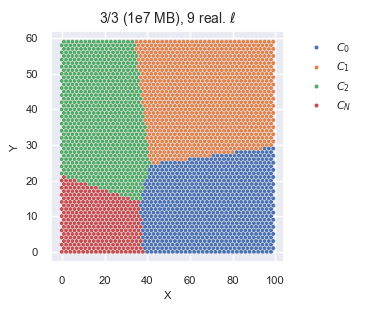

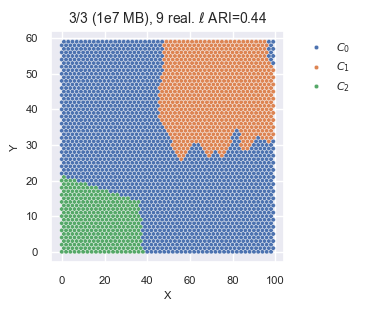

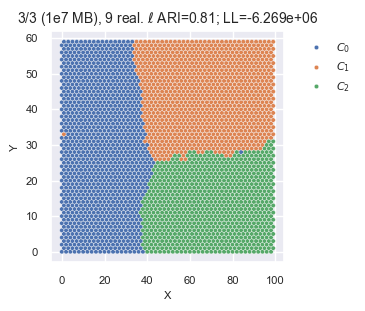

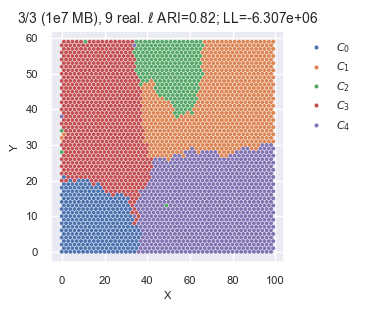

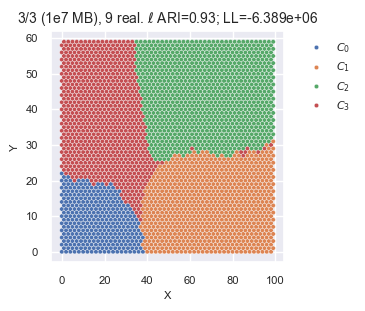

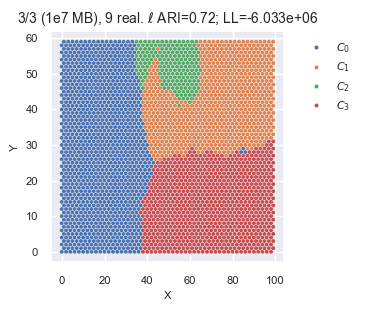

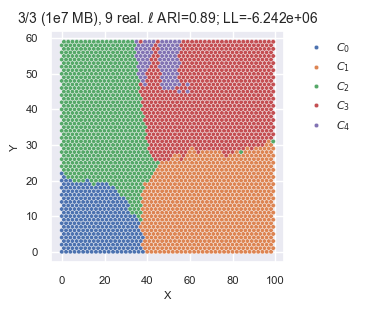

In [13]:
_ = plot_clones(true_clones, *run, column="true_clone")
_ = plot_clones(starch_clones, *run)
_ = plot_clones(numbat_clones, *run)

for seed in range(5):
    _ = plot_clones(calico_clones[seed], *run, column="est_clone")

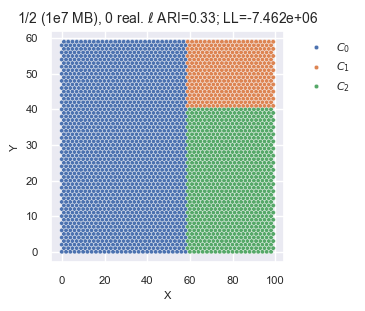

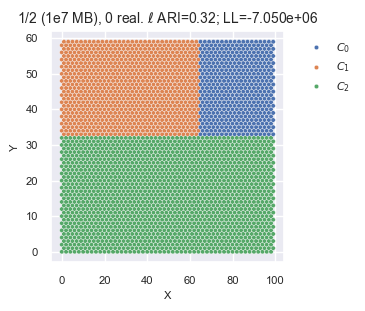

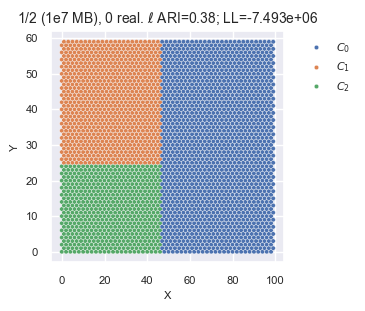

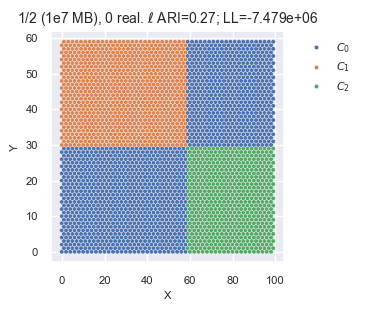

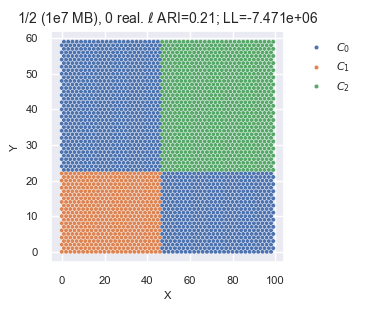

In [19]:
for seed in range(5):
    _ = plot_clones(calico_clones[seed], *run, column="initial_clone")

In [14]:
true_cna = read_true_cna(
    true_dir,
    *run,
    non_neutral_only=True
)
true_cna

chr      start        end  length [MB]  A_copy  B_copy cna_gtype cna_ctype  cna_id
clone                                                                                      
clone_0    1   57827566   67827566 1.000000e+01       3       1       3|1       AMP       4
clone_0    9    7510363   17510363 1.000000e+01       0       1       0|1       DEL       3
clone_0    9  116064182  126064182 1.000000e+01       2       1       2|1       AMP       0
clone_0   10    9540020   19540020 1.000000e+01       3       1       3|1       AMP       1
clone_0   17   58468593   68468593 1.000000e+01       2       1       2|1       AMP       2
clone_0   19   44065598   54065598 1.000000e+01       1       3       1|3       AMP       5
clone_1    2   29801381   39801381 1.000000e+01       2       0       2|0     CNLOH       8
clone_1    9  116064182  126064182 1.000000e+01       2       1       2|1       AMP       0
clone_1   10    9540020   19540020 1.000000e+01       3       1       3|1       AMP       1
clone_1   10   24940472   34940472 1.000000e+01       2       0       2|0     CNLOH       7
clone_1   17   58468593   68468593 1.000000e+01       2       1       2|1       AMP       2
clone_1   20    4135126   14135126 1.000000e+01       2       1       2|1       AMP       6
clone_2    4   12989752   22989752 1.000000e+01       0       1       0|1       DEL      10
clone_2    9  116064182  126064182 1.000000e+01       2       1       2|1       AMP       0
clone_2   10    9540020   19540020 1.000000e+01       3       1       3|1       AMP       1
clone_2   15   62570103   72570103 1.000000e+01       2       2       2|2       AMP       9
clone_2   17   58468593   68468593 1.000000e+01       2       1       2|1       AMP       2
clone_2   17   62746253   72746253 1.000000e+01       3       1       3|1       AMP      11

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:456: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:456: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:456: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:456: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],


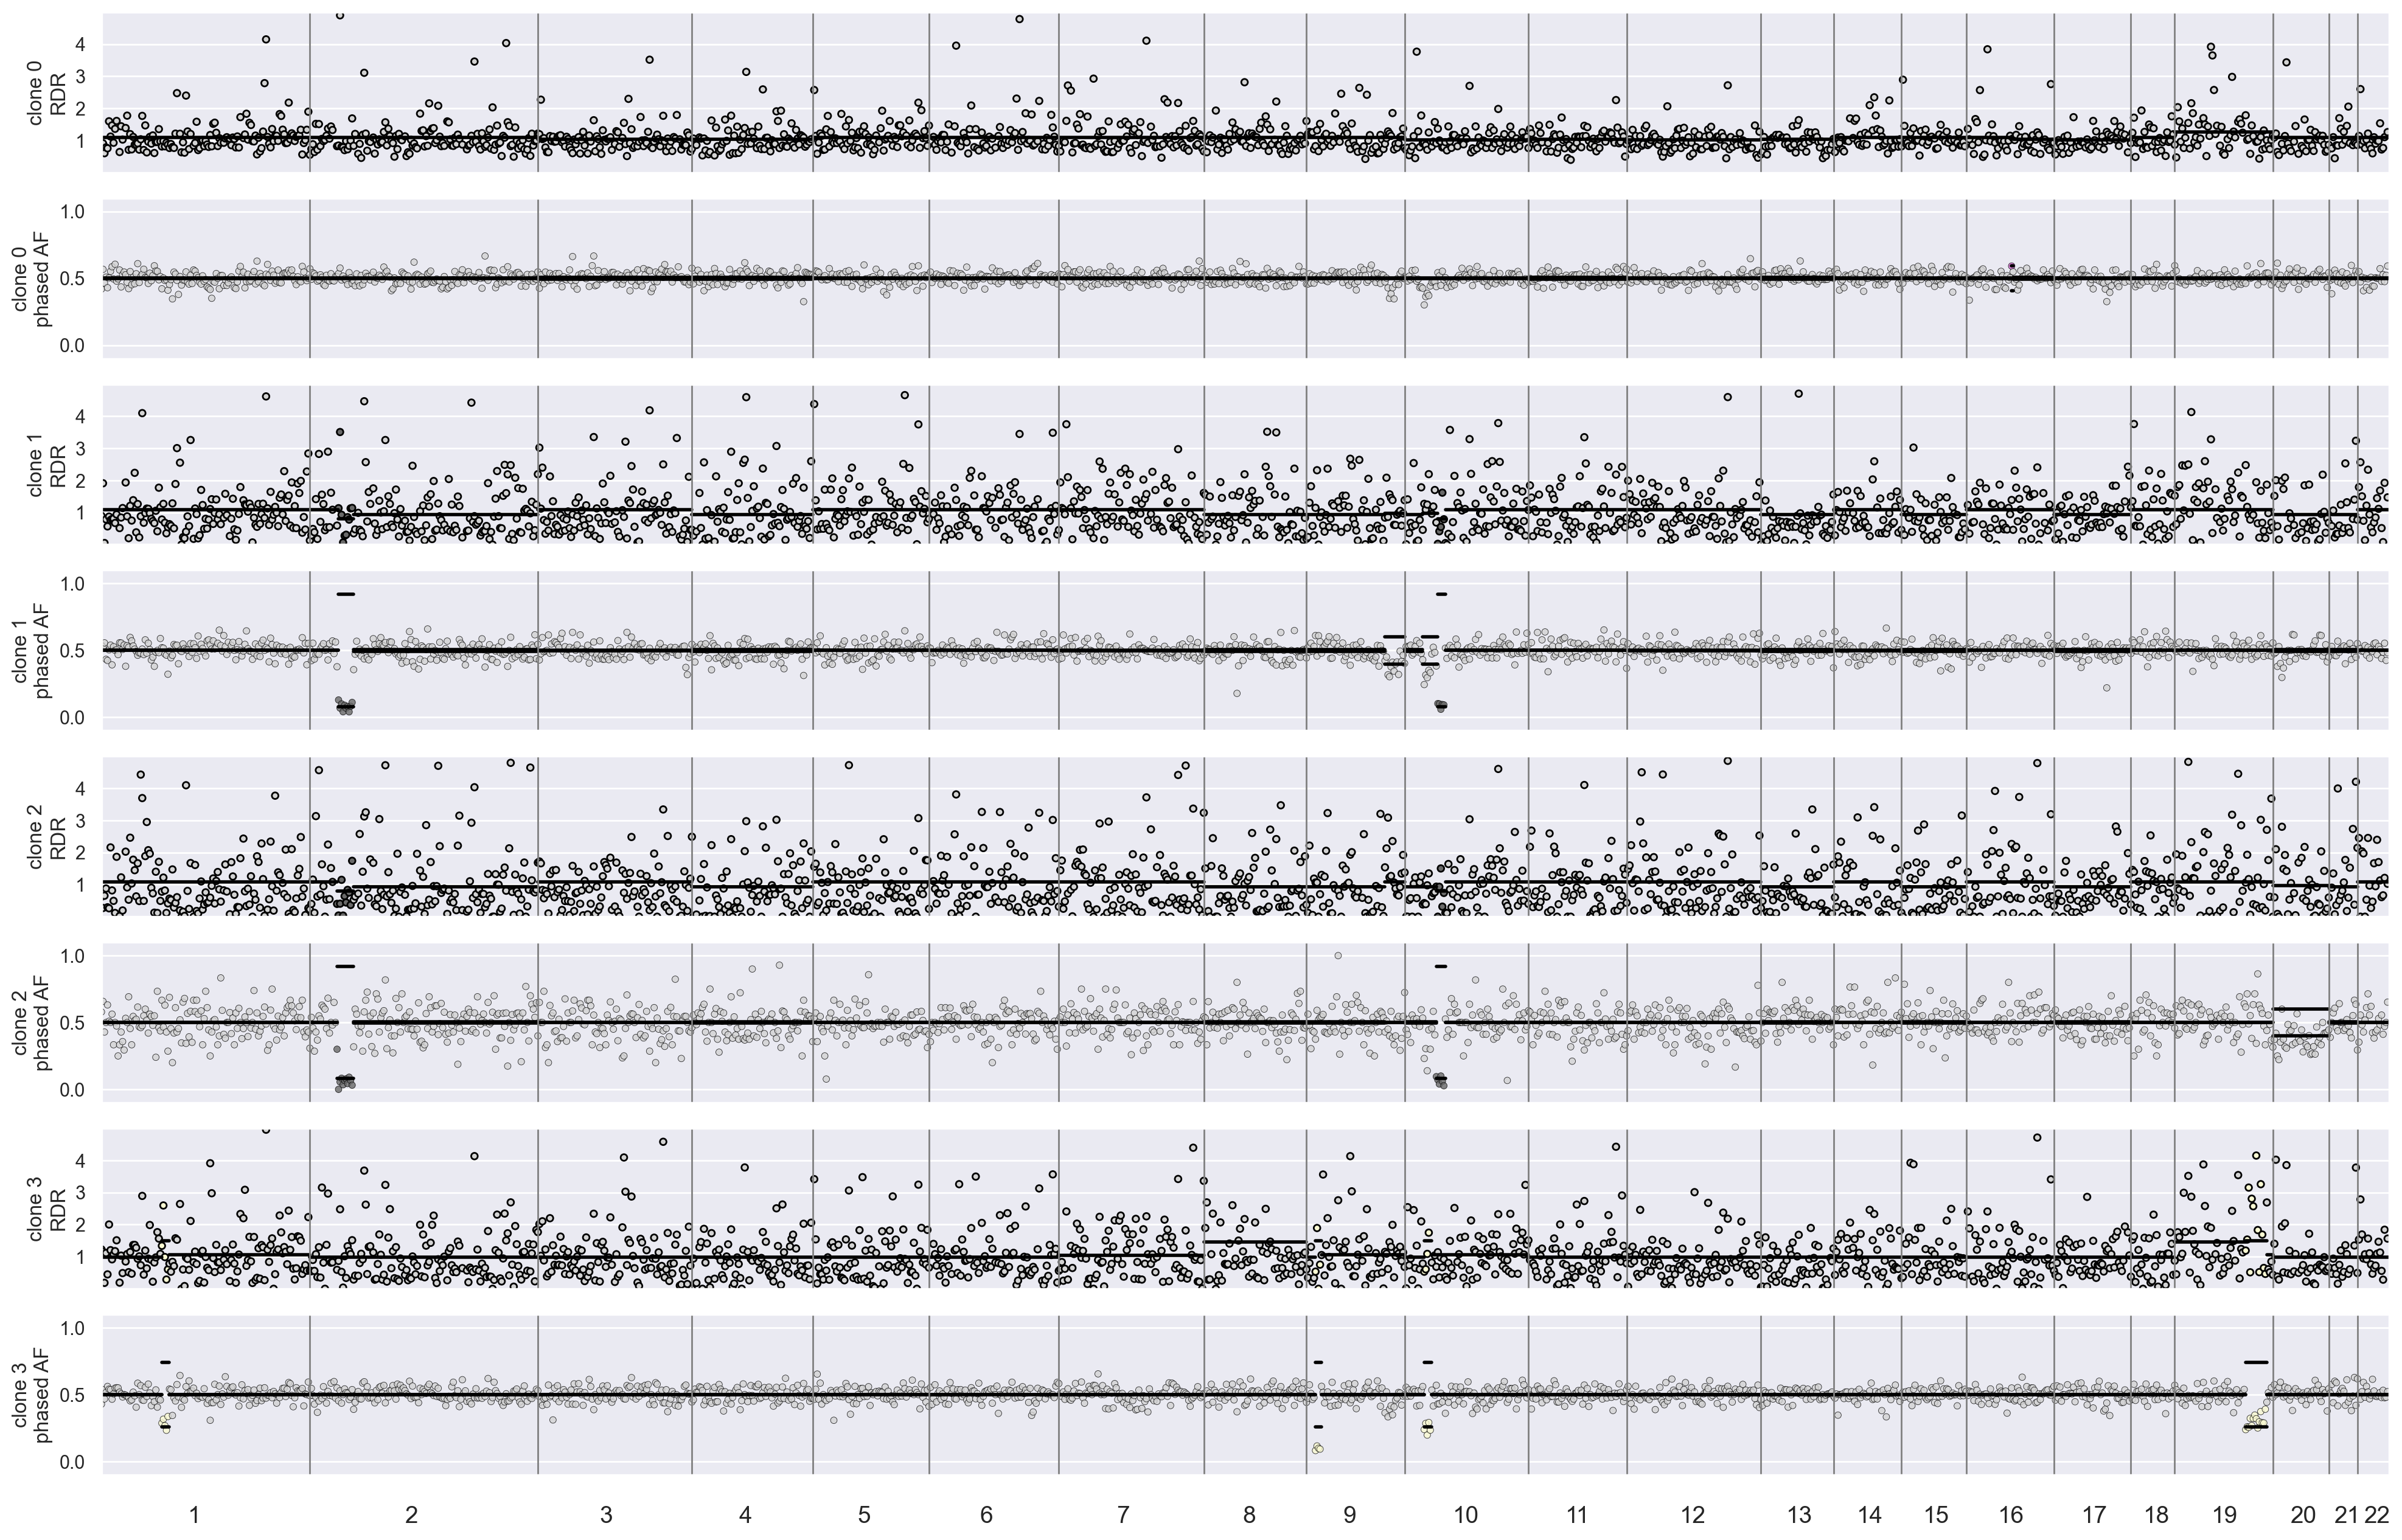

In [15]:
_ = plot_rdr_baf(calico_pure_dir, *run, 3)

In [20]:
# allspots = get_calicost_results(calico_pure_dir, *run, best_initialization, "allspots_nstates7_sp.npz")
# list(allspots.keys()) # ["round-1_assignment"]

# calico_clones[0]["initial_clone"] = allspots["round-1_assignment"]
# calico_clones[0]

# plot_clones(numbat_clones, *run)

calico_clones[0]

est_clone true_clone   x   y  initial_clone
spot                                             
0             0          2   0   0              0
1             0          2   0   2              0
2             0          2   0   4              0
3             0          2   0   6              0
4             0          2   0   8              0
...         ...        ...  ..  ..            ...
2995          1          0  99  51              1
2996          1          0  99  53              1
2997          1          0  99  55              1
2998          1          0  99  57              1
2999          1          0  99  59              1

[3000 rows x 5 columns]

# Clone identification accuracy

In [32]:
clone_aris = get_clone_aris(true_dir, calico_pure_dir, numbat_dir, starch_dir, exp_initialization_num)

# NB best CalicoST clones only; 90 sims X 3 methods.
# assert len(clone_aris) == 270

# NB 90 sims X 3 methods x # of available realizations.
clone_aris

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1392: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  else:
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1392: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random1/outs/clone_post_2.tsv does not exist.
  else:
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1392: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random4/outs/clone_post_2.tsv does not exist.
  else:
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1392: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random9/outs/clone_post_2.tsv does not exist.
  else:
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:259: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random0/clone3_rectangle0_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")
/Users/mw9568/Work/ragr

simid    cnas  n_cnas cna_size  ploidy  random                                   true_clones_path    method  calicost_seed  method_best       recall          ari  calicost_log_likelihood                                        clones_path     ari_rank  simid_ari_max  calicost_log_likelihood_rank  calicost_log_likelihood_max_ari
0    numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3     10Mb       2       0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST              0            0 9.815541e-01 3.936033e-01            -7.462320e+06  ../nomixing_calicost_related/numcnas1.2_cnasiz... 2.000000e+00   6.943948e-01                  2.000000e+00                    -7.050466e+06
1    numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3     10Mb       2       0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST              1            1 9.324343e-01 6.943948e-01            -7.050466e+06  ../nomixing_calicost_related/numcnas1.2_cnasiz... 1.000000e+00   6.943948e-01                  1.000000e+00                    -7.050466e+06
2    numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3     10Mb       2       0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST              2            0 9.039142e-01 3.648118e-01            -7.493413e+06  ../nomixing_calicost_related/numcnas1.2_cnasiz... 5.000000e+00   6.943948e-01                  5.000000e+00                    -7.050466e+06
3    numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3     10Mb       2       0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST              3            0 9.066724e-01 3.663132e-01            -7.479450e+06  ../nomixing_calicost_related/numcnas1.2_cnasiz... 4.000000e+00   6.943948e-01                  4.000000e+00                    -7.050466e+06
4    numcnas1.2_cnasize1e7_ploidy2_random0  (1, 2)       3     10Mb       2       0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST              4            0 9.735262e-01 3.908725e-01            -7.470724e+06  ../nomixing_calicost_related/numcnas1.2_cnasiz... 3.000000e+00   6.943948e-01                  3.000000e+00                    -7.050466e+06
..                                     ...     ...     ...      ...     ...     ...                                                ...       ...            ...          ...          ...          ...                      ...                                                ...          ...            ...                           ...                              ...
443  numcnas6.3_cnasize5e7_ploidy2_random9  (6, 3)       9     50Mb       2       9  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST              0            1 9.492958e-01 9.425610e-01            -5.979919e+06  ../nomixing_calicost_related/numcnas6.3_cnasiz... 5.000000e+00   9.614593e-01                  1.000000e+00                    -6.358086e+06
444  numcnas6.3_cnasize5e7_ploidy2_random9  (6, 3)       9     50Mb       2       9  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST              1            0 9.603934e-01 9.499225e-01            -6.374666e+06  ../nomixing_calicost_related/numcnas6.3_cnasiz... 4.000000e+00   9.614593e-01                  4.000000e+00                    -6.358086e+06
445  numcnas6.3_cnasize5e7_ploidy2_random9  (6, 3)       9     50Mb       2       9  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST              2            0 9.616481e-01 9.573532e-01            -6.332358e+06  ../nomixing_calicost_related/numcnas6.3_cnasiz... 2.000000e+00   9.614593e-01                  2.000000e+00                    -6.358086e+06
446  numcnas6.3_cnasize5e7_ploidy2_random9  (6, 3)       9     50Mb       2       9  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST              3            0 9.678130e-01 9.523622e-01            -6.424922e+06  ../nomixing_calicost_related/numcnas6.3_cnasiz... 3.000000e+00   9.614593e-01                  5.000000e+00                    -6.358086e+06
447  numcna

Text(0, 0.5, '$\\ln L \\ / \\ (\\ln L \\ | \\ MAX \\ ARI, SIMID)$')

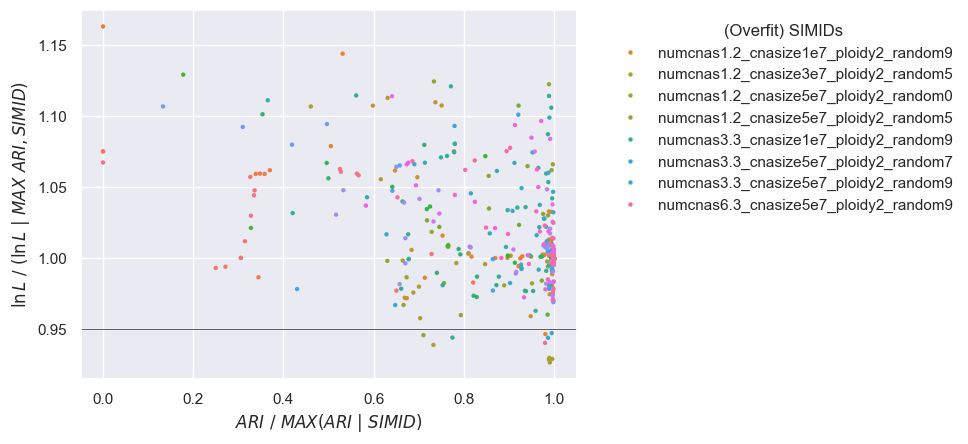

In [46]:
lnlike_threshold = 0.95

isin = clone_aris["calicost_log_likelihood"] / clone_aris["calicost_log_likelihood_max_ari"] < lnlike_threshold
selected_df = clone_aris[isin]

scatter_plot = sns.scatterplot(
    x=clone_aris["ari"] / clone_aris["simid_ari_max"],
    y=clone_aris["calicost_log_likelihood"] / clone_aris["calicost_log_likelihood_max_ari"],
    hue=clone_aris["simid"],
    marker='o',
    lw=0.0,
    s=10, 
)

handles, labels = scatter_plot.get_legend_handles_labels()
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l in selected_df['simid'].unique()]

# Create the custom legend
scatter_plot.legend(
    handles=[h for h, l in filtered_handles_labels],
    labels=[l for h, l in filtered_handles_labels],
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,
    title='(Overfit) SIMIDs'
)

plt.axhline(lnlike_threshold, lw=0.5, c='k')

plt.xlabel(r"$ARI \ / \ MAX(ARI \ | \ SIMID)$")
plt.ylabel(r"$\ln L \ / \ (\ln L \ | \ MAX \ ARI, SIMID)$")

# plt.legend([],[], frameon=False)

In [24]:
cm = confusion_matrix(clone_aris["ari_rank"], clone_aris["calicost_log_likelihood_rank"])
cm

array([[30, 27, 19, 17,  5],
       [21, 23, 30, 12,  7],
       [19, 17, 15, 18, 22],
       [14, 13, 16, 31, 15],
       [ 7, 11, 10, 13, 36]])

2024-12-11 12:20:52 - INFO - Substituting symbol L from STIXNonUnicode
2024-12-11 12:20:52 - INFO - Substituting symbol L from STIXNonUnicode


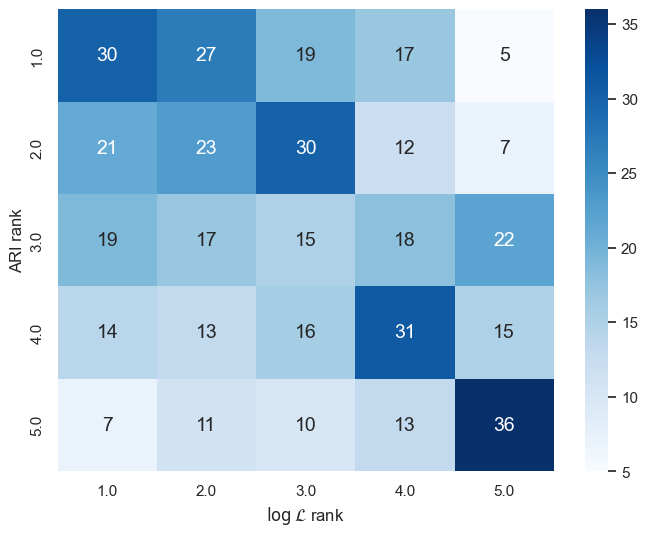

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(clone_aris["ari_rank"]), yticklabels=np.unique(clone_aris["calicost_log_likelihood_rank"]))
plt.xlabel(r'$\log \mathcal{L}$ rank')
plt.ylabel('ARI rank')
plt.show()

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1600: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


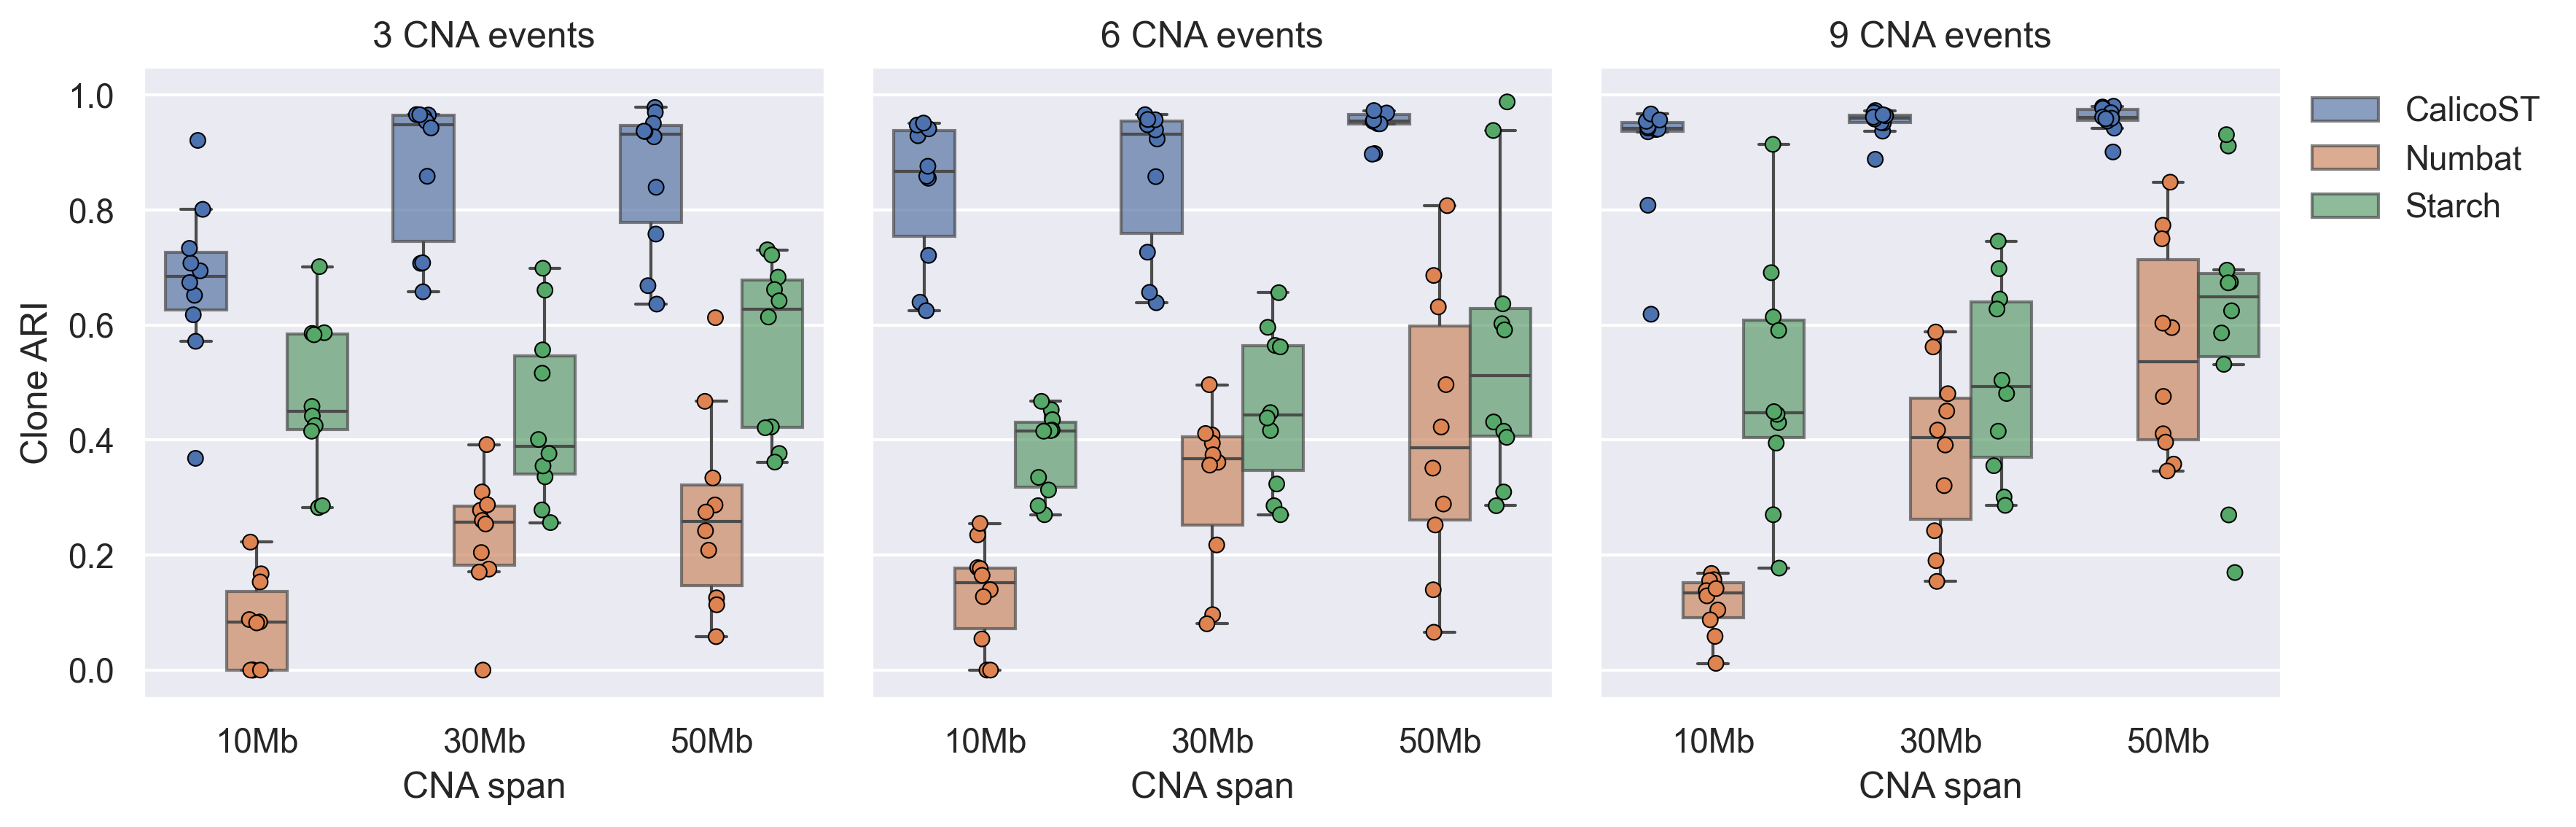

In [18]:
plot_clone_aris(clone_aris[(clone_aris["method_best"] == 1)])

# Event detection accuracy

The detection accuracy is evalated on a per-gene level:
the precision & sensitivity of genes involved in each category of event (Deletion, Amplication, LOH) for all events.

In [19]:
cna_f1s = get_cna_f1s(calico_repo_dir, true_dir, calico_pure_dir, numbat_dir, starch_dir)

# NB best CalicoST clones only; 90 sims X 3 methods X 4 types (DEL, AMP, CNLOH, ALL).
assert len(cna_f1s) == 1_080

columns = ["cnas", "n_cnas", "cna_size", "random", "method", "F1", "precision", "recall"]
cna_f1s[columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:241: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random0/clone3_rectangle0_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:241: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random2/clone3_rectangle2_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")


cnas  n_cnas cna_size  random    method           F1    precision       recall
0     (1, 2)       3     10Mb       0  CalicoST 3.783784e-01 1.000000e+00 2.333333e-01
1     (1, 2)       3     10Mb       0  CalicoST 1.157556e-01 6.143345e-02 1.000000e+00
2     (1, 2)       3     10Mb       0  CalicoST 7.906977e-01 6.891892e-01 9.272727e-01
3     (1, 2)       3     10Mb       0  CalicoST 2.192513e-01 1.290661e-01 7.278107e-01
4     (1, 2)       3     10Mb       0    Numbat 0.000000e+00 0.000000e+00 0.000000e+00
...      ...     ...      ...     ...       ...          ...          ...          ...
1075  (6, 3)       9     50Mb       9    Numbat 8.639922e-01 9.966140e-01 7.625216e-01
1076  (6, 3)       9     50Mb       9    Starch 1.796200e-01 1.017613e-01 7.647059e-01
1077  (6, 3)       9     50Mb       9    Starch 0.000000e+00 0.000000e+00 0.000000e+00
1078  (6, 3)       9     50Mb       9    Starch 0.000000e+00 0.000000e+00 0.000000e+00
1079  (6, 3)       9     50Mb       9    Starch 3.032787e-01 2.007233e-01 6.201117e-01

[1080 rows x 8 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1768: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_xti

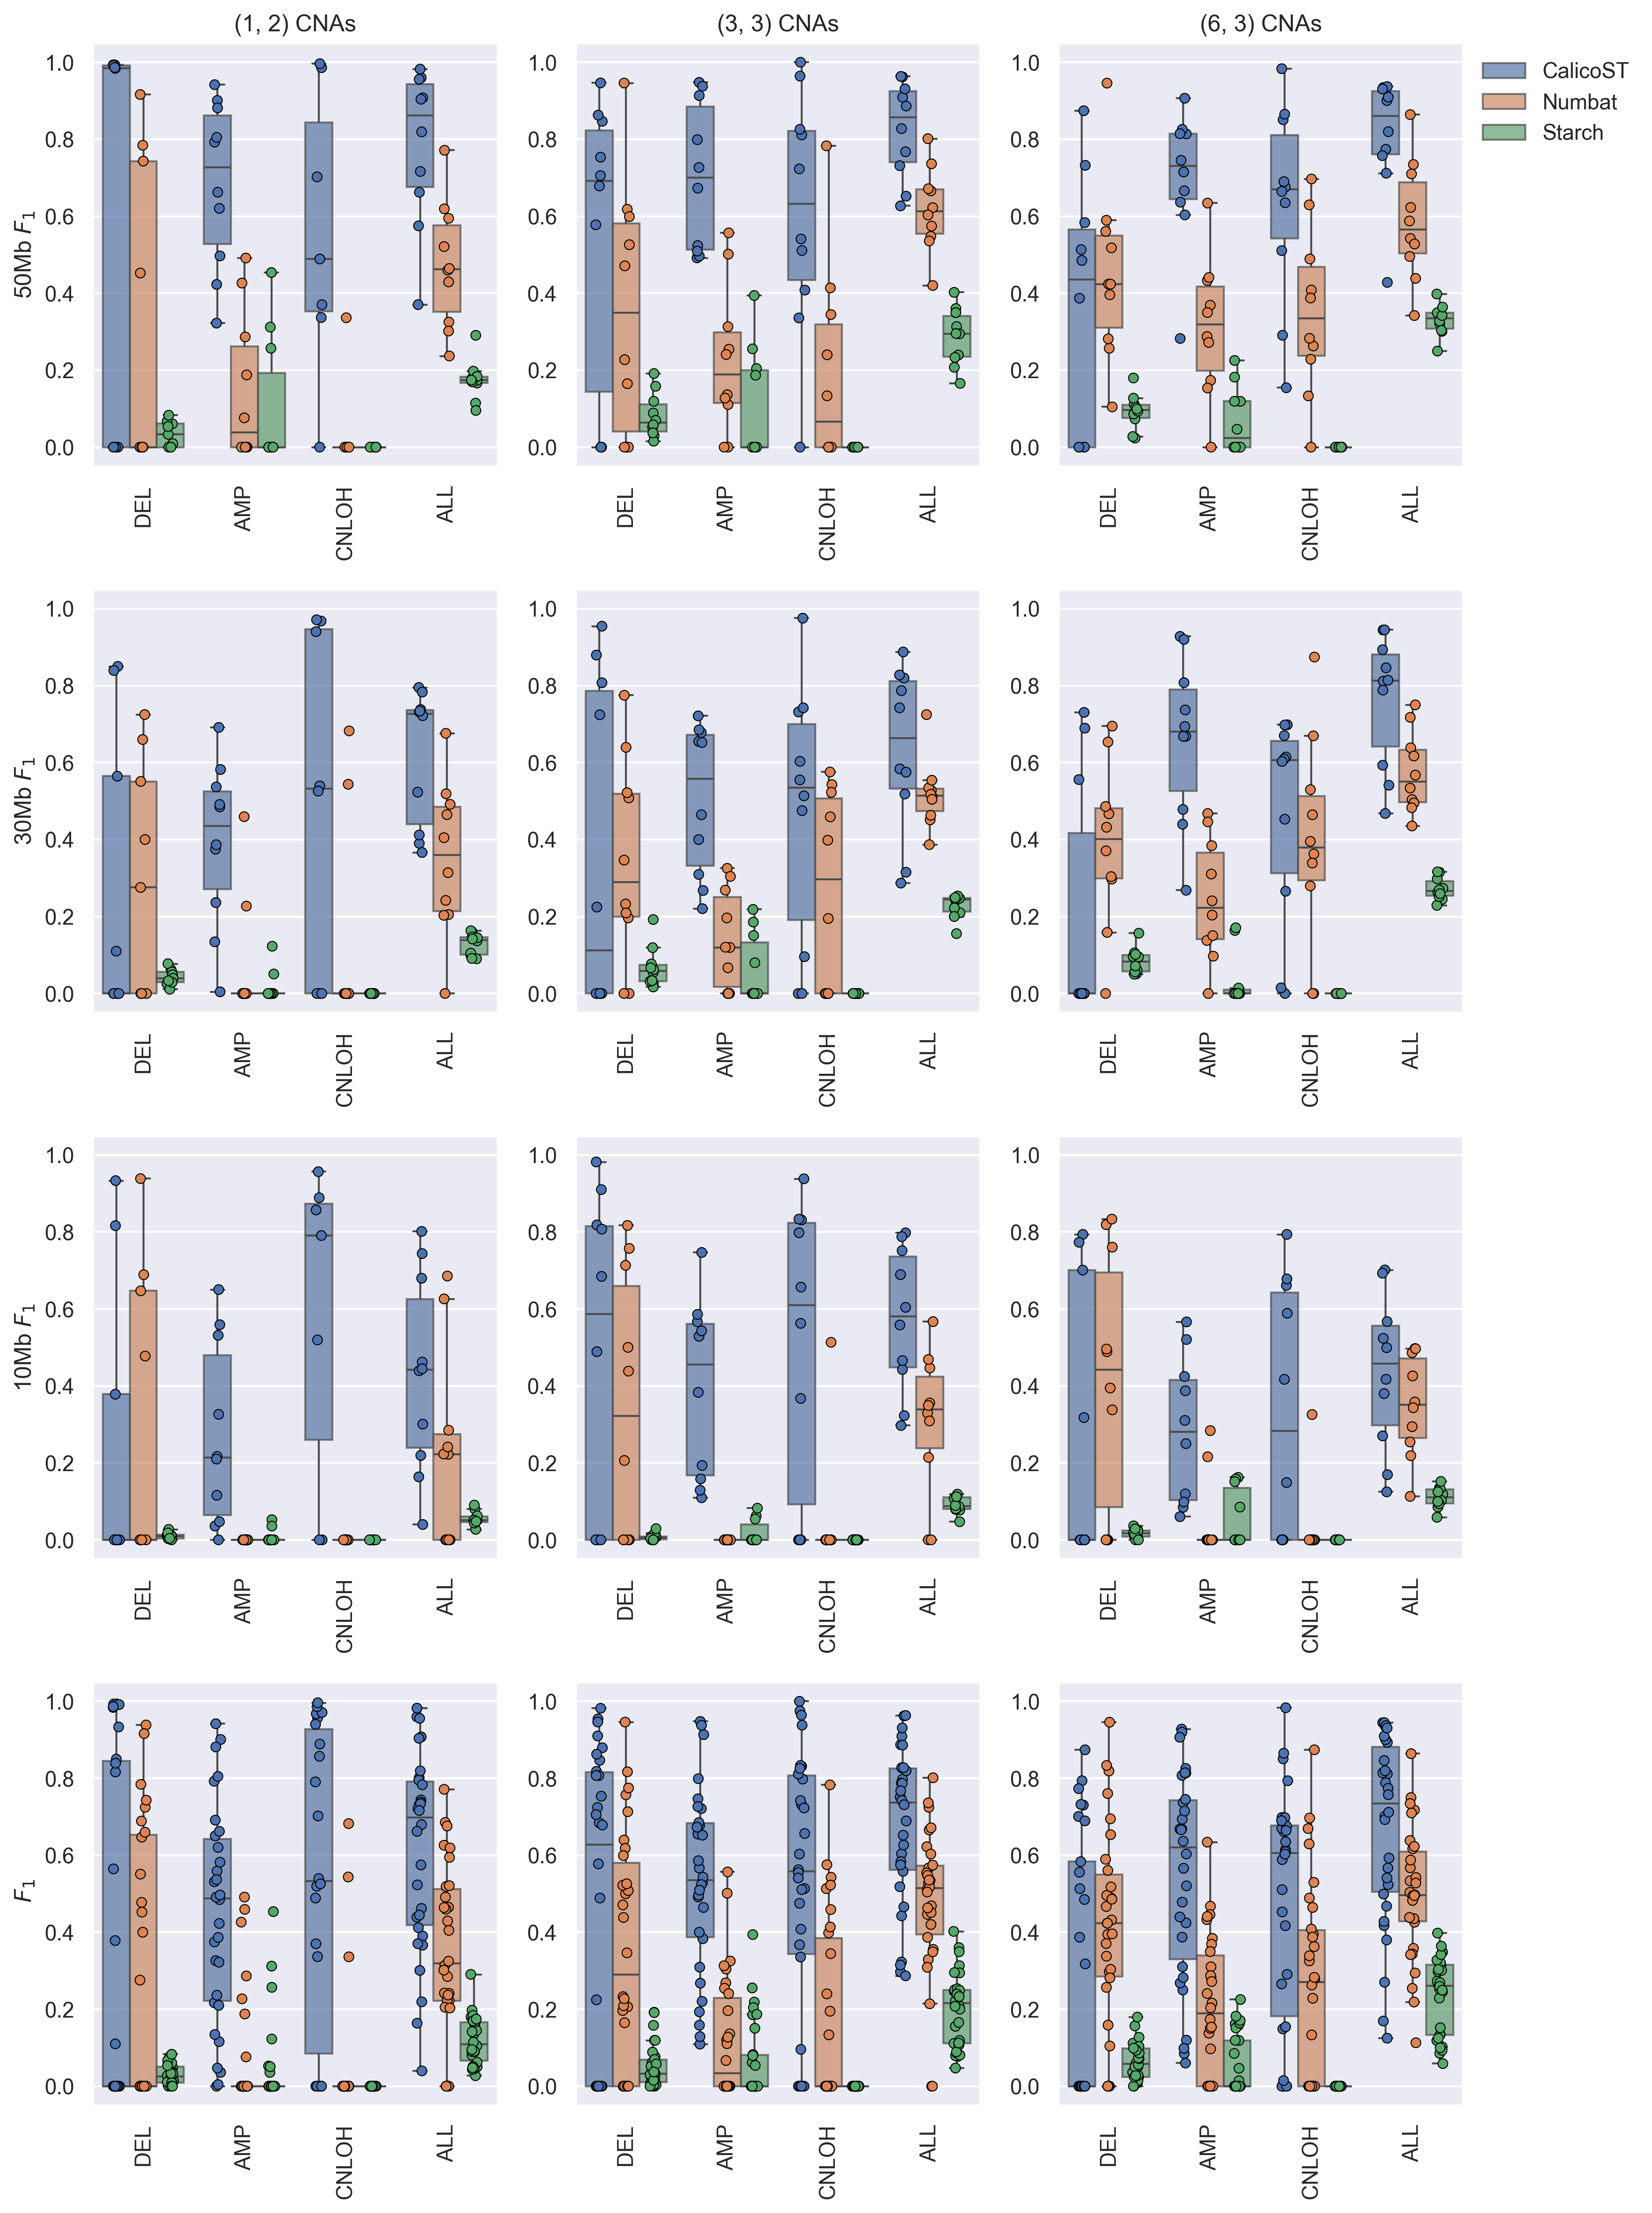

In [20]:
plot_cna_f1s(cna_f1s)

# Done.